In [50]:
import tensorflow as tf;

print(tf.__version__)

2.12.0


# Step 1. Import the data from the given .csv file

In [51]:
import pandas as pd;
diabetes_data = pd.read_csv("/Users/sowmyamanchikanti/DATA 255/Assignments/Assignment1/diabetes.csv",header=None)
diabetes_data.head(10)

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
5,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1
6,-0.647059,-0.216080,-0.180328,-0.353535,-0.791962,-0.076006,-0.854825,-0.833333,0
7,0.176471,0.155779,0.000000,0.000000,0.000000,0.052161,-0.952178,-0.733333,1
8,-0.764706,0.979899,0.147541,-0.090909,0.283688,-0.090909,-0.931682,0.066667,0
9,-0.058824,0.256281,0.573770,0.000000,0.000000,0.000000,-0.868488,0.100000,0


# Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

In [52]:
#Preprocess the data by separating features and label
X= diabetes_data.iloc[:,:-1]
y= diabetes_data.iloc[:,-1]

In [53]:
print(X)
print(y)

            0         1         2         3         4         5         6  \
0   -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1   -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2   -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3   -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4    0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   
..        ...       ...       ...       ...       ...       ...       ...   
754  0.176471  0.015075  0.245902 -0.030303 -0.574468 -0.019374 -0.920581   
755 -0.764706  0.226131  0.147541 -0.454545  0.000000  0.096870 -0.776260   
756 -0.411765  0.216080  0.180328 -0.535354 -0.735225 -0.219076 -0.857387   
757 -0.882353  0.266332 -0.016393  0.000000  0.000000 -0.102832 -0.768574   
758 -0.882353 -0.065327  0.147541 -0.373737  0.000000 -0.093890 -0.797609   

            7  
0   -0.033333  
1   -0.666667  
2   -0.633333  
3    0.0000

In [54]:
print(X.shape)
print(y.shape)

(759, 8)
(759,)


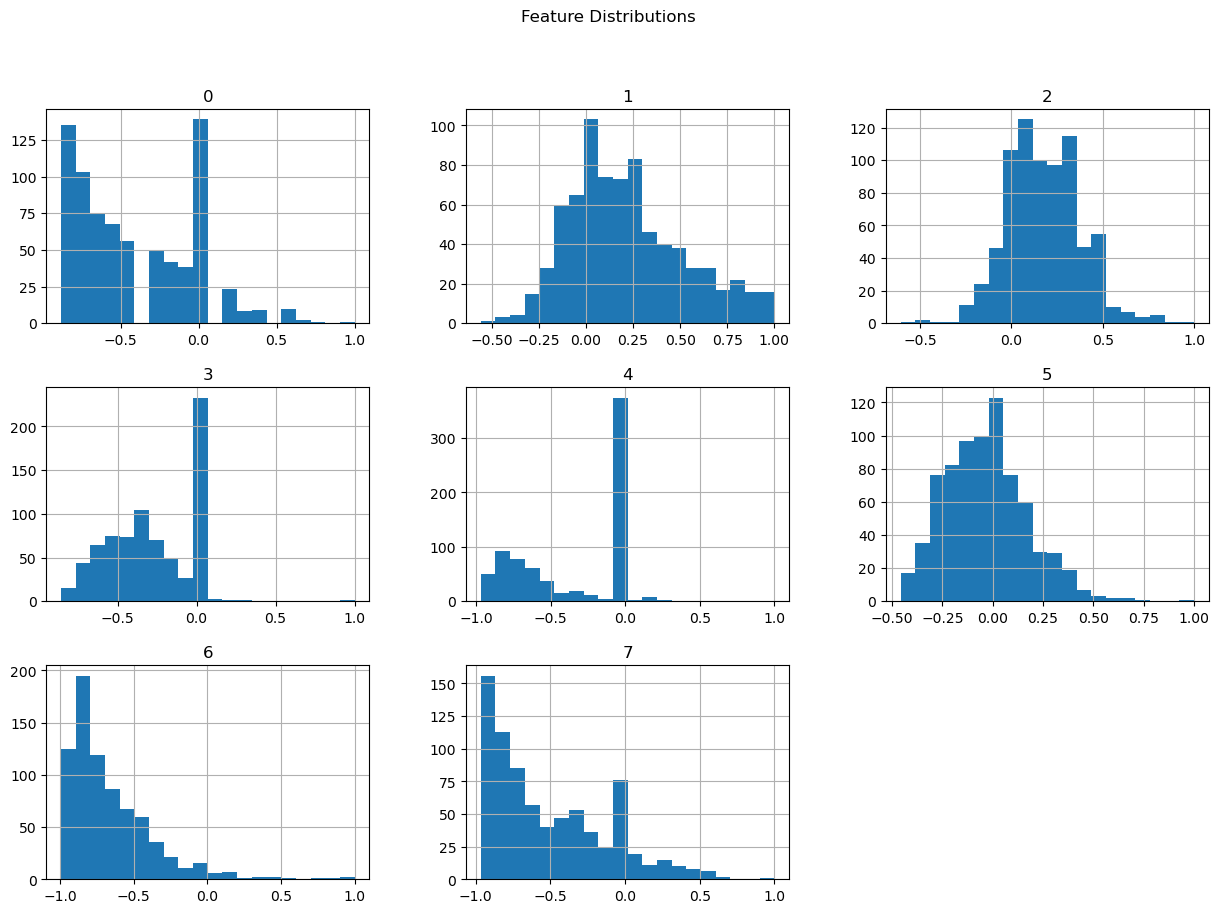

In [55]:
# Visualize the distribution of each feature using histograms
import matplotlib.pyplot as plt

X.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Step 3. Split into 80% train 20% test

In [56]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shape of the datasets after splitting
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (607, 8)
X_test shape: (152, 8)
y_train shape: (607,)
y_test shape: (152,)


# Step 4. Modify the model shown in the demo to take the new data

In [57]:
# Create a Deep Model
sample_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(16,activation='sigmoid',input_shape=[X_train.shape[1],]),
                                    tf.keras.layers.Dense(16,activation='relu'),
                                    tf.keras.layers.Dense(1)
                                    ])

In [58]:
# Compile the model with an optimizer
sample_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                     metrics=['binary_accuracy'])

In [59]:
# Print out the details of the model after compiling
sample_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                144       
                                                                 
 dense_37 (Dense)            (None, 16)                272       
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


# Step 5. Train the model on the data

In [60]:
# Fit the model using training data and validate on test data
sample_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 0.6659 - binary_accuracy: 0.6442 - val_loss: 0.6280 - val_binary_accuracy: 0.6908
Epoch 2/5
19/19 [==============================] - 0s 979us/step - loss: 0.6464 - binary_accuracy: 0.6425 - val_loss: 0.6025 - val_binary_accuracy: 0.6974
Epoch 3/5
19/19 [==============================] - 0s 988us/step - loss: 0.6294 - binary_accuracy: 0.6524 - val_loss: 0.5852 - val_binary_accuracy: 0.7105
Epoch 4/5
19/19 [==============================] - 0s 932us/step - loss: 0.6162 - binary_accuracy: 0.6557 - val_loss: 0.5712 - val_binary_accuracy: 0.7237
Epoch 5/5
19/19 [==============================] - 0s 1ms/step - loss: 0.6057 - binary_accuracy: 0.6524 - val_loss: 0.5459 - val_binary_accuracy: 0.7171


# Step 6. Make predictions on the test data and compare them to the test labels

In [61]:
def PredictandCompare(X_test, y_test, model):
    predictions = model.predict(X_test)
    # Print actual values and corresponding predicted values
    binaryPredictions=[]
    for actual, predicted in zip(y_test, predictions):
        predicted_value = 1 if predicted > 0.5 else 0
        binaryPredictions.append(predicted_value)
        print(f"Actual Value: {actual}, Predicted Value: {predicted_value}")
    return binaryPredictions
    
binaryPredictions = PredictandCompare(X_test, y_test, sample_model)

5/5 [==============================] - 0s 473us/step
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Valu

# Step 7. Calculate the accuracy of your results

In [62]:
from sklearn.metrics import accuracy_score

# Function to calculate and print evaluation metrics
def calculate_metrics(y_true, predictions, label):
    accuracy = accuracy_score(y_true, predictions)
    print(f"Accuracy of {label}: {accuracy}")

calculate_metrics(y_test, binaryPredictions, "sample_model")

Accuracy of sample_model: 0.7171052631578947


# Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

Hypothesis 1: A more complex model may capture intricate patterns in the data.

Hypothesis 2: Changing the learning rate may affect the convergence speed and accuracy.

Hypothesis 3: Applying regularization may prevent overfitting.

Hypothesis 4: Different activation functions may impact the model's ability to learn.

Hypothesis 5: Training for more epochs might allow the model to converge to a better solution.

# Step 9. Test your hypothesis by training your new models

Hypothesis 1

In [63]:
# A more complex model by increasing the number of nodes may capture intricate patterns in the data.
hypo1_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=[X_train.shape[1],]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

hypo1_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                     metrics=['binary_accuracy'])

hypo1_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 0.6680 - binary_accuracy: 0.5947 - val_loss: 0.6231 - val_binary_accuracy: 0.6908
Epoch 2/5
19/19 [==============================] - 0s 872us/step - loss: 0.6393 - binary_accuracy: 0.6507 - val_loss: 0.5812 - val_binary_accuracy: 0.6908
Epoch 3/5
19/19 [==============================] - 0s 826us/step - loss: 0.6356 - binary_accuracy: 0.6590 - val_loss: 0.5672 - val_binary_accuracy: 0.6908
Epoch 4/5
19/19 [==============================] - 0s 882us/step - loss: 0.5967 - binary_accuracy: 0.6623 - val_loss: 0.5497 - val_binary_accuracy: 0.7303
Epoch 5/5
19/19 [==============================] - 0s 835us/step - loss: 0.5765 - binary_accuracy: 0.6787 - val_loss: 0.5161 - val_binary_accuracy: 0.7105


Hypothesis 2

In [64]:
# Increasing learning rate
# Create a Deep Model
from tensorflow.keras.optimizers import Adam

hypo2_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(16,activation='sigmoid',input_shape=[X_train.shape[1],]),
                                    tf.keras.layers.Dense(16,activation='relu'),
                                    tf.keras.layers.Dense(1)
                                    ])

learning_rate = 0.045

# Create an optimizer with the specified learning rate
optimizer2 = Adam(learning_rate=learning_rate)
hypo2_model.compile(optimizer=optimizer2,
                    loss='binary_crossentropy',
                     metrics=['binary_accuracy'])
hypo2_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 9.3857 - binary_accuracy: 0.3789 - val_loss: 10.6554 - val_binary_accuracy: 0.3092
Epoch 2/5
19/19 [==============================] - 0s 765us/step - loss: 9.9360 - binary_accuracy: 0.3558 - val_loss: 10.6554 - val_binary_accuracy: 0.3092
Epoch 3/5
19/19 [==============================] - 0s 742us/step - loss: 9.9360 - binary_accuracy: 0.3558 - val_loss: 10.6554 - val_binary_accuracy: 0.3092
Epoch 4/5
19/19 [==============================] - 0s 764us/step - loss: 9.9360 - binary_accuracy: 0.3558 - val_loss: 10.6554 - val_binary_accuracy: 0.3092
Epoch 5/5
19/19 [==============================] - 0s 716us/step - loss: 9.9360 - binary_accuracy: 0.3558 - val_loss: 10.6554 - val_binary_accuracy: 0.3092


Hypothesis 3

In [65]:
# Applying regularization may prevent overfitting.
hypo3_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=[X_train.shape[1],]),
    tf.keras.layers.Dropout(0.2),  # Add Dropout layer
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Add L2 regularization
    tf.keras.layers.Dense(1)
])
hypo3_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                     metrics=['binary_accuracy'])
hypo3_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 1.4136 - binary_accuracy: 0.5321 - val_loss: 1.3100 - val_binary_accuracy: 0.3882
Epoch 2/5
19/19 [==============================] - 0s 839us/step - loss: 1.4114 - binary_accuracy: 0.5865 - val_loss: 1.3513 - val_binary_accuracy: 0.3092
Epoch 3/5
19/19 [==============================] - 0s 837us/step - loss: 1.2983 - binary_accuracy: 0.5931 - val_loss: 1.1696 - val_binary_accuracy: 0.6974
Epoch 4/5
19/19 [==============================] - 0s 791us/step - loss: 1.2232 - binary_accuracy: 0.5898 - val_loss: 1.3554 - val_binary_accuracy: 0.3092
Epoch 5/5
19/19 [==============================] - 0s 796us/step - loss: 1.2823 - binary_accuracy: 0.5601 - val_loss: 1.1213 - val_binary_accuracy: 0.6974


Hypothesis 4

In [66]:
# Using different activation functions like Softmax,tanh may impact the model's learning ability.
hypo4_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='tanh', input_shape=[X_train.shape[1],]),
    tf.keras.layers.Dense(16, activation='softmax'),
    tf.keras.layers.Dense(1)
])
hypo4_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                     metrics=['binary_accuracy'])
hypo4_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
19/19 [==============================] - 0s 3ms/step - loss: 1.1755 - binary_accuracy: 0.3558 - val_loss: 1.1189 - val_binary_accuracy: 0.3092
Epoch 2/5
19/19 [==============================] - 0s 768us/step - loss: 0.9904 - binary_accuracy: 0.3558 - val_loss: 0.9656 - val_binary_accuracy: 0.3092
Epoch 3/5
19/19 [==============================] - 0s 757us/step - loss: 0.8801 - binary_accuracy: 0.3558 - val_loss: 0.8651 - val_binary_accuracy: 0.3092
Epoch 4/5
19/19 [==============================] - 0s 727us/step - loss: 0.8071 - binary_accuracy: 0.3558 - val_loss: 0.7926 - val_binary_accuracy: 0.3092
Epoch 5/5
19/19 [==============================] - 0s 727us/step - loss: 0.7550 - binary_accuracy: 0.3558 - val_loss: 0.7398 - val_binary_accuracy: 0.3092


Hypothesis 5

In [67]:
# Increase the number of training epochs.
hypo5_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(16,activation='sigmoid',input_shape=[X_train.shape[1],]),
                                    tf.keras.layers.Dense(16,activation='relu'),
                                    tf.keras.layers.Dense(1)
                                    ])
hypo5_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                     metrics=['binary_accuracy'])
hypo5_model.fit(X_train, y_train, epochs=45, validation_data=(X_test, y_test))


Epoch 1/45
19/19 [==============================] - 0s 3ms/step - loss: 9.9360 - binary_accuracy: 0.3558 - val_loss: 10.6554 - val_binary_accuracy: 0.3092
Epoch 2/45
19/19 [==============================] - 0s 849us/step - loss: 9.9360 - binary_accuracy: 0.3558 - val_loss: 10.6554 - val_binary_accuracy: 0.3092
Epoch 3/45
19/19 [==============================] - 0s 875us/step - loss: 9.9360 - binary_accuracy: 0.3558 - val_loss: 10.6554 - val_binary_accuracy: 0.3092
Epoch 4/45
19/19 [==============================] - 0s 853us/step - loss: 9.9360 - binary_accuracy: 0.3558 - val_loss: 10.6554 - val_binary_accuracy: 0.3092
Epoch 5/45
19/19 [==============================] - 0s 806us/step - loss: 9.9360 - binary_accuracy: 0.3558 - val_loss: 10.6554 - val_binary_accuracy: 0.3092
Epoch 6/45
19/19 [==============================] - 0s 814us/step - loss: 9.9360 - binary_accuracy: 0.3558 - val_loss: 10.6554 - val_binary_accuracy: 0.3092
Epoch 7/45
19/19 [==============================] - 0s 830us

# Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why. 

In [68]:
hypo1_predictions = PredictandCompare(X_test, y_test,hypo1_model)

5/5 [==============================] - 0s 425us/step
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Valu

In [69]:
hypo2_predictions = PredictandCompare(X_test, y_test,hypo2_model)

5/5 [==============================] - 0s 478us/step
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Valu

In [70]:
hypo3_predictions = PredictandCompare(X_test, y_test,hypo3_model)

5/5 [==============================] - 0s 417us/step
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Value: 1, Predicted Value: 1
Actual Value: 0, Predicted Value: 1
Actual Valu

In [71]:
hypo4_predictions = PredictandCompare(X_test, y_test,hypo4_model)

5/5 [==============================] - 0s 419us/step
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Valu

In [72]:
hypo5_predictions = PredictandCompare(X_test, y_test,hypo5_model)

5/5 [==============================] - 0s 410us/step
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Value: 1, Predicted Value: 0
Actual Value: 0, Predicted Value: 0
Actual Valu

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for each set of predictions
calculate_metrics(y_test, hypo1_predictions, label='Hypothesis 1')
calculate_metrics(y_test, hypo2_predictions, label='Hypothesis 2')
calculate_metrics(y_test, hypo3_predictions, label='Hypothesis 3')
calculate_metrics(y_test, hypo4_predictions, label='Hypothesis 4')
calculate_metrics(y_test, hypo5_predictions, label='Hypothesis 5')

Accuracy of Hypothesis 1: 0.7105263157894737
Accuracy of Hypothesis 2: 0.3092105263157895
Accuracy of Hypothesis 3: 0.6973684210526315
Accuracy of Hypothesis 4: 0.3092105263157895
Accuracy of Hypothesis 5: 0.3092105263157895


### Observations

1. When the the number of nodes in dense layers is increased, it is increasing the accuracy of the model but if it exceeds, sometimes overfitting the data and gives high and low accuracy. The number of nodes should be decided according to data.
2. I did not notice much difference in accuracy when learning rate and infact, sometimes reducing the accuracy when learning rate is more.
3. Adding the Regularization paramter, the accuracy of the model is increased
4. When the activation function is changed multiple times, different accuracy is given as patterns learnt is different.
5. Increasing number of epochs also increases the performance but overfitting after certain range.